Challenge # 4: Page View Time Series Visualizer

In [125]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [128]:
# 1. Import data (Make sure to parse dates. Consider setting index column to 'date'.)

url = 'https://raw.githubusercontent.com/viable-data-analyst/Page_View_timeSeries_analysis/refs/heads/main/fcc-forum-pageviews.csv?token=GHSAT0AAAAAAC4GLH5VBSRUAX5GQXVWWZRKZ3OXRQA'
df = pd.read_csv(url, sep = ',', parse_dates = True, index_col = 'date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [129]:
# 2. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

    # Method with 'Between' to filter within a range
# df_bounds = df['value'].between(
#     df['value'].quantile(0.025), 
#     df['value'].quantile(0.975))

    # Classical method by applying range conditions
df_bounds = ((df['value'] >= df['value'].quantile(0.025)) &
             (df['value'] <= df['value'].quantile(0.975)))

df_bounds.shape[0]

1304

3. Create a `draw_line_plot` function that uses **Matplotlib** to draw a line chart similar to `"examples/Figure_1.png"`. The title should be **Daily freeCodeCamp Forum Page Views 5/2016-12/2019**. The label on the `x axis` should be **Date** and the label on the `y axis` should be **Page Views**.

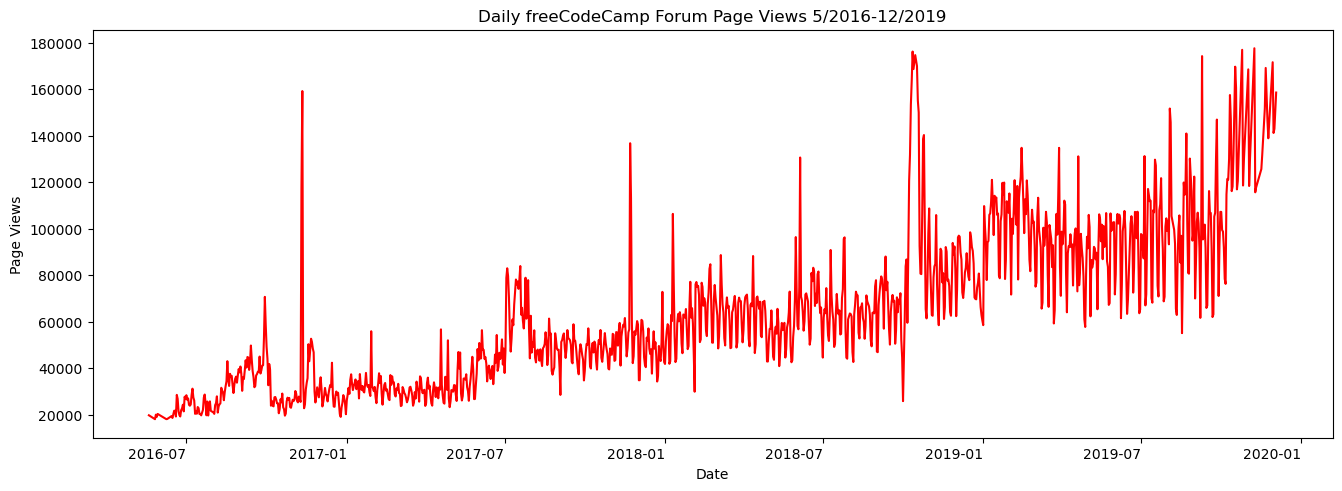

In [130]:
# Let's apply the mask 'df_bounds' to the dataframe 'df'

df_masked = df[df_bounds]
fig = df_masked.plot(kind = 'line', figsize = (16,6), 
               c = 'red',
               legend = None,
               xlabel= 'Date',
               ylabel= 'Page Views',
               title= 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

fig
plt.xticks(rotation = 0) # Set the X labels (dates) in horizontal position 
plt.show()

4. Create a `draw_bar_plot` function that draws a **bar chart** similar to `"examples/Figure_2.png"`. It should show **average** daily page views for each month grouped by year. The `legend` should show **month labels** and have a title of `Months`. On the chart, the label on the `x axis` should be **Years** and the label on the `y axis` should be **Average Page Views**.

In [131]:
# Grouping the dataframe by year and month, calculating the average 'views' value
# and reshaping (unstack) the data so that months become columns and years become the index
df_masked_bar = df_masked.groupby([df_masked.index.year, 
                                      df_masked.index.month])['value'].mean().unstack()

# Create a DatetimeIndex with the year and month information
month_index = pd.to_datetime(df_masked_bar.columns, format='%m') 

# Rename the columns using strftime on the DatetimeIndex
df_masked_bar.columns = month_index.strftime('%B') 

df_masked_bar

date,January,February,March,April,May,June,July,August,September,October,November,December
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


In [132]:
# Code for bar plot
df_masked_bar.columns.name = 'Months'
df_masked_bar

Months,January,February,March,April,May,June,July,August,September,October,November,December
date,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


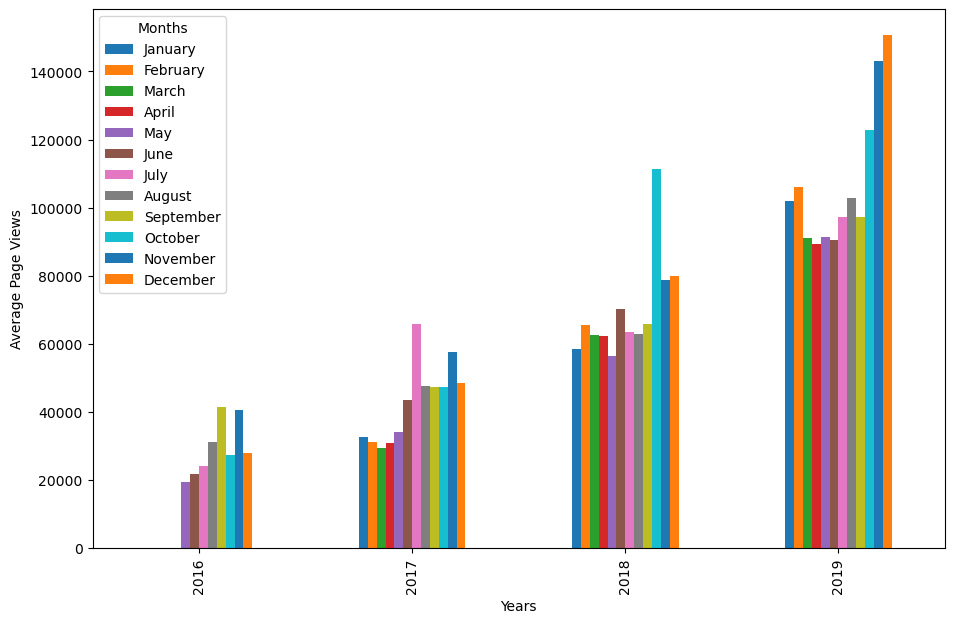

In [133]:
fig = df_masked_bar.plot(kind = 'bar', figsize = (11,7),
                         xlabel = 'Years', 
                         ylabel = 'Average Page Views'
                         )

5. Create a `draw_box_plot` function that uses Seaborn to draw two adjacent box plots similar to `"examples/Figure_3.png"`. These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be `Year-wise Box Plot (Trend)` and the title of the second chart should be `Month-wise Box Plot (Seasonality)`. Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

In [174]:
# Preparing data for box plots
df_box = df_masked.copy() # Create a copy of the mask dataframe
df_box.reset_index(inplace=True) # Reset index
df_box['year'] = [d.year for d in df_box.date] # Creates Year column and adds year number from date column
df_box['month'] = [d.strftime('%b') for d in df_box.date] # Creates Month column and adds the name of the month based on the month number


In [110]:
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


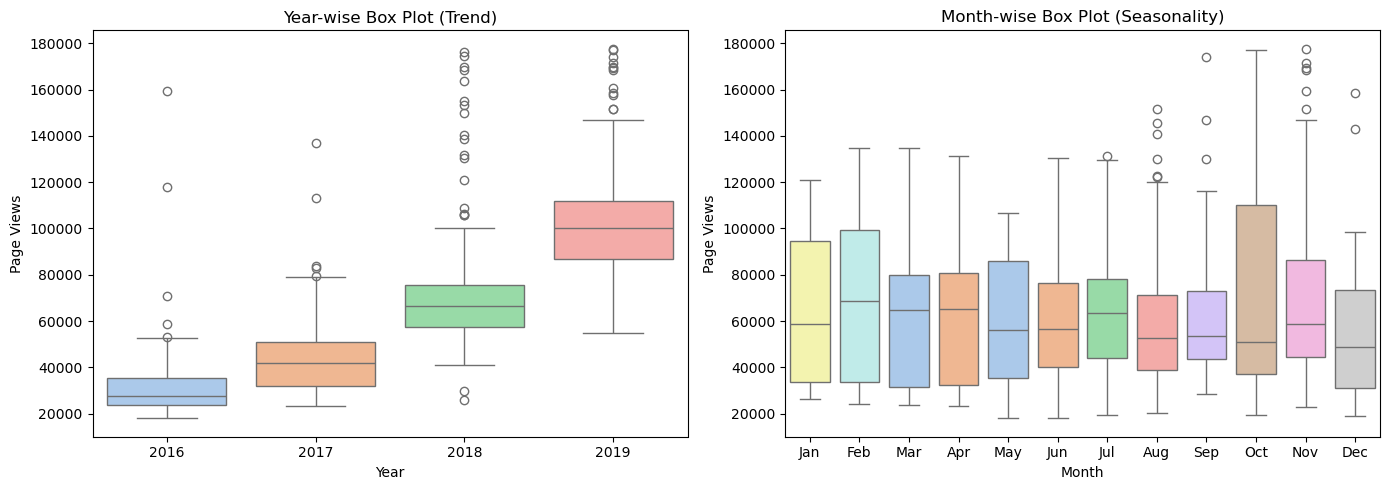

In [175]:
# Draw box plots (using Seaborn)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(14,5))

# Axis 1 -> Views by year
sb.boxplot(data = df_box, ax = ax1, # Plot assigned to axis 1 (first column)
                 x = 'year', y = 'value', hue = 'year', legend = None, palette = 'pastel')
ax1.set(xlabel = 'Year', ylabel = 'Page Views', title = 'Year-wise Box Plot (Trend)')

# Axis 2 -> Views by month
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

sb.boxplot(data = df_box, ax = ax2, # Plot assigned to axis 2 (second column)
           x = 'month', y = 'value', hue = 'month', order = month_order,
           legend = None, palette = 'pastel')
ax2.set(xlabel = 'Month', ylabel = 'Page Views', title = 'Month-wise Box Plot (Seasonality)')

plt.tight_layout()
plt.show()